In [1]:
%run ../input/python-recipes/dhtml.py
dhtml('Code Modules','#3636ff')

In [2]:
from IPython.core.display import display,HTML
import random,numpy as np,sympy as sp
import pandas as pd,pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

In [3]:
dhtml('Let Us Be Serious in Function Plotting','#3636ff')

In [4]:
def taylor_approx(exp,x0=None,orders=(2,5),
                  figs=(11,4),num=200,
                  xlim=(0,1),ylim=None):
    if not callable(exp):
        raise ValueError(
            'the function must be callable')
    if isinstance(xlim,(list,tuple)):
        x=np.linspace(float(xlim[0]),
                      float(xlim[1]),num)
    else:
        x=xlim
    if x0 is None: x0=x[0]
    xs=sp.Symbol('x'); fx=exp(xs); apps={}
    f=sp.lambdify(xs,fx,modules=['numpy'])
    pl.figure(figsize=figs)
    pl.plot(x,f(x),label=str(fx),lw=2)
    for order in orders:
        app=fx.series(xs,x0,n=order).removeO()
        apps[order]=app
        if isinstance(app,sp.numbers.Number):
            y=np.zeros_like(x)
            y.fill(app.evalf())
        else:
            fa=sp.lambdify(xs,app,modules=['numpy'])
            y=fa(x)
        lbl=sp.latex(app).replace('$','')
        pl.plot(x,y,label=r'$n=%s:\, %s$'%(order,lbl))
    if ylim is not None:
        pl.ylim(*ylim)
    pl.legend(loc='best',fontsize=15)\
    .get_frame().set_alpha(.8)
    pl.grid(); pl.tight_layout(); pl.show()

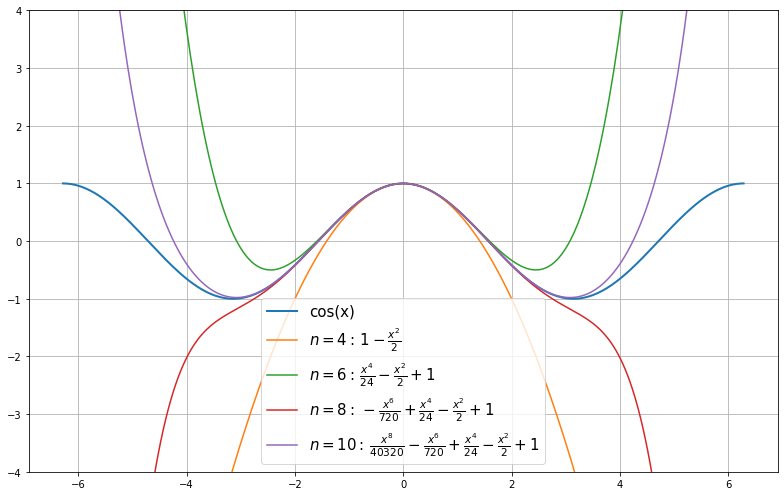

In [5]:
taylor_approx(sp.cos,0,[4,6,8,10],(11,7),300,
              (-2*sp.pi,2*sp.pi),(-4,4))

In [6]:
dhtml('Fun Plotting Can Be Extremely Serious','#3636ff')

In [7]:
pi=np.pi
X=[[[67/5,pi/2,0],[-14/5,11/7,-10],[2942/7,16/5,1],
    [43/5,39/10,2],[123/4,3/7,3],[10,3/5,4],
    [39/4,15/4,5],[44/7,49/12,6],[7/2,1,7],
    [29/7,8/7,8],[5/4,23/6,9]]+6*[[0,0,0]],
   [[-4019/4,pi/2,0],[-22/5,4/3,-8],[1841/6,19/7,1],
    [357/4,23/11,2],[106/3,4,3],[351/14,1/14,4],
    [127/8,22/7,5],[36/5,33/7,6],[91/18,22/9,7],
    [23/6,1/5,9],[17/6,9/2,10]]+6*[[0,0,0]],
   [[1198/3,pi/2,0],[-61/15,8/9,-8],[-51/5,4/3,-6],
    [1453/4,14/5,1],[614/7,13/6,2],[75/2,13/3,3],
    [122/5,1/16,4],[175/11,13/4,5],[19/4,9/5,7],
    [5,1/2,9],[13/7,4,10]]+6*[[0,0,0]],
   [[-13027/13,pi/2,0],[-14/3,2/5,-6],[-29/5,5/9,-5],
    [-37/4,1/3,-4],[3021/7,97/32,1],[179/9,34/11,2],
    [53/5,29/10,3],[1/2,18/5,7],[11/6,16/7,8],
    [11/5,7/3,9],[5/6,11/5,10]]+6*[[0,0,0]],
   [[785/2,pi/2,0],[-3/5,1/6,-10],[-23/7,2/7,-6],
    [-23/3,1/8,-5],[-10,1/5,-4],[2417/5,34/11,1],
    [89/4,16/5,2],[11/5,14/5,3],[31/16,17/6,7],
    [20/7,23/8,8],[17/7,11/4,9]]+6*[[0,0,0]],
   [[-1087/5,pi/2,0],[-2,4/3,-16],[-39/11,6/5,-14],
    [-21/4,14/9,-12],[-41/3,3/2,-6],
    [5028/5,23/12,1],[713/14,17/5,2],[103/3,7/3,3],
    [258/7,13/3,4],[142/13,1,5],[179/15,9/7,7],
    [17/3,13/3,8],[47/6,5/3,9],[90/13,22/5,10],
    [18/5,13/7,11],[18/5,7/5,13],[26/7,7/4,15]],
   [[-277/3,pi/2,0],[8875/6,28/9,1]]+15*[[0,0,0]],
   [[-467/5,pi/2,0],[4832/3,31/10,1]]+15*[[0,0,0]]]
Y=[[[-6393/7,pi/2,0],[-1/3,4/3,-10],[-21/22,3/5,-9],
    [-4,7/5,-5],[-21/4,1/4,-4],[4217/17,9/2,1],
    [74/3,15/7,2],[32/3,11/7,3],[7/4,16/5,6],
    [2,13/6,7],[4/5,2/3,8]]+6*[[0,0,0]],
   [[4843/9,pi/2,0],[-209/6,1/5,-4],[-249/8,6/5,-3],
    [577/2,40/9,1],[184/3,9/4,2],[83/7,2/3,5],
    [25/3,12/5,6],[5,17/6,7],[5/3,1/7,8],
    [23/6,1/4,9],[5/4,5/4,10]]+6*[[0,0,0]],
   [[5301/10,pi/2,0],[-131/4,4/5,-3],[1781/6,9/2,1],
    [422/7,9/4,2],[189/5,1/16,4],[79/6,8/5,5],
    [34/3,26/9,6],[22/5,23/7,7],[35/12,2/7,8],
    [11/4,5/7,9],[14/5,10/3,10]]+6*[[0,0,0]],
   [[2127/4,pi/2,0],[401,23/5,1],[118/3,7/5,2],
    [68/3,6/5,3],[133/8,6/5,4],[11/3,4/3,5],
    [24/7,57/14,6],[34/7,45/11,7],[25/7,37/9,8],
    [1/3,19/5,9],[9/5,3/5,10]]+6*[[0,0,0]],
   [[3688/7,pi/2,0],[13121/32,14/3,1],[44,10/7,2],
    [123/4,7/5,3],[15,4/3,4],[3/4,12/5,5],
    [27/5,13/3,6],[40/7,31/7,7],[13/6,13/3,8],
    [6/5,6/5,9],[58/19,1,10]]+6*[[0,0,0]],
   [[-9879/19,pi/2,0],[-19/7,8/7,-12],[-103/5,7/8,-5],
    [-80/9,11/7,-4],[3665/6,18/5,1],
    [803/6,13/5,2],[441/8,9/2,3],[17/2,4/5,6],
    [27/5,1/3,7],[17/3,2,8],[9/5,24/7,9],
    [15/4,26/7,10],[13/5,41/9,11],[16/17,1/5,13],
    [23/11,1/4,14],[7/4,25/12,15],[2/3,9/7,16]],
   [[1105/12,pi/2,0],[5913/4,14/3,1]]+15*[[0,0,0]],
   [[359/4,pi/2,0],[8012/5,14/3,1]]+15*[[0,0,0]]]

In [8]:
def fun_sage(X,Y,width=650,height=750):
    html_str="""<html><head><meta charset='utf-8'>"""+\
    """<script src='https://sagecell.sagemath.org/"""+\
    """static/embedded_sagecell.js'>"""+\
    """</script><script>$(function() {"""+\
    """sagecell.makeSagecell({inputLocation:'div.plot_fun',"""+\
    """evalButtonText:'run',autoeval:true,"""+\
    """template:sagecell.templates.minimal}); """+\
    """});</script></head><body>"""+\
    """<div class='plot_fun'><script type='text/x-sage'>"""+\
    """X="""+str(X)+""";\n"""+\
    """Y="""+str(Y)+""";\n"""+\
    """def bf(k,t):\n"""+\
    """    return k[0]*sin(k[1]+k[2]*t)\n"""+\
    """def us(j,t):\n"""+\
    """    return unit_step((31-4*j)*pi-t)*"""+\
    """unit_step((-27+4*j)*pi+t)\n"""+\
    """def gus(t):\n"""+\
    """    return unit_step(sign(sin(t/2)))\n"""+\
    """@interact\n"""+\
    """def _(a=(.9,.1,-.05),b=(.9,.1,-.05),c=(.9,.1,-.05)):\n"""+\
    """    K=[a,b,c,b,c,a,1,1]\n"""+\
    """    x(t)=gus(t)*sum([sum([bf(X[j][i],t) """+\
    """                          for i in range(17)])*us(j,t) """+\
    """                     for j in range(8)])\n"""+\
    """    y(t)=gus(t)*sum([sum([K[j]*bf(Y[j][i],t) """+\
    """                          for i in range(17)])*us(j,t) """+\
    """                     for j in range(8)])\n"""+\
    """    p=Graphics()\n"""+\
    """    p+=parametric_plot((x(t),y(t)),(t,0,32*pi),\n"""+\
    """                       exclude=[2*pi*i for i in range(16)],\n"""+\
    """                       fill=True,fillalpha=.5,\n"""+\
    """                       fillcolor='bisque',color='crimson')\n"""+\
    """    p.axes_color('silver'); p.tick_label_color('silver')\n"""+\
    """    p.show(gridlines=True,figsize=7)"""+\
    """</script></div></body></html>"""
    file='sage_coderun'+str(random.uniform(0,9999999))+'.html'
    with open(file,'w') as f:
        f.write(html_str); f.close()
    string="""<div id='html_string2'><iframe src='"""+\
           file+"""' height="""+str(height+20)+\
           """ width="""+str(width+20)+"""></iframe></div>"""
    display(HTML(string))    

In [9]:
fun_sage(X,Y)

In [10]:
dhtml('Don`t Tell Me That You Don`t Like This',
      '#3636ff')

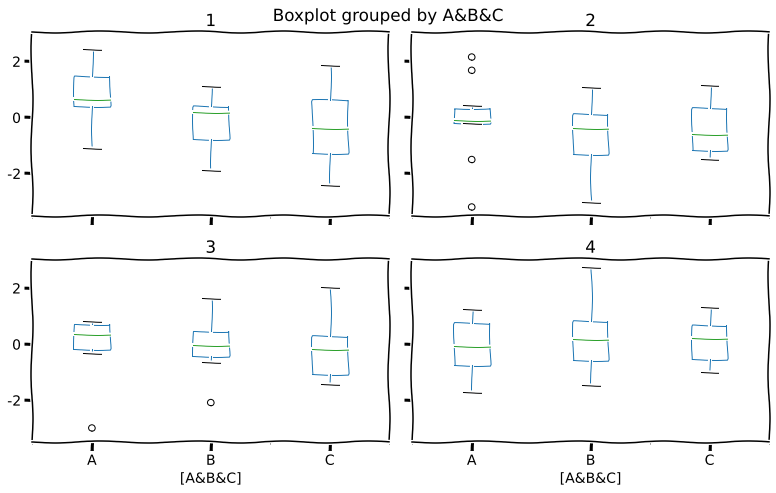

In [11]:
pl.xkcd()
df=pd.DataFrame(np.random.randn(30,4),
                columns=['1','2','3','4'])
df['A&B&C']=pd.Series(
    10*['A']+10*['B']+10*['C'])
df.boxplot(by='A&B&C',figsize=(11,7))
pl.tight_layout();

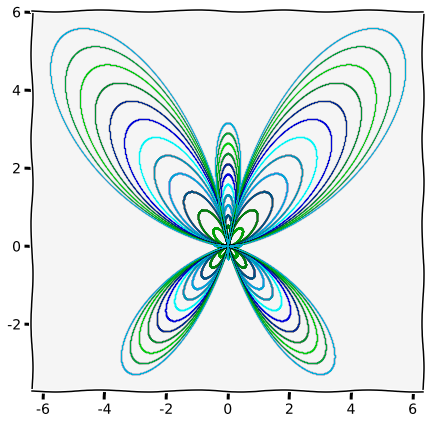

In [12]:
pi=np.pi 
t=np.arange(0,2*pi,.1**4)
def col(): 
    return [np.append([0],np.random.random(2))]
def f(t): 
    return np.exp(np.cos(t)**2+np.sin(t))-3*np.cos(4*t)
def fx(k,t): 
    return .1*(k+1)*f(t)*np.cos(t)
def fy(k,t): 
    return .1*(k+1)*f(t)*np.sin(t)
pl.figure(figsize=(7,7))
ax=pl.gca(); ax.set_facecolor('whitesmoke')
[pl.scatter(fx(i,t),fy(i,t),s=.1**3,c=col()) 
 for i in range(12)];  

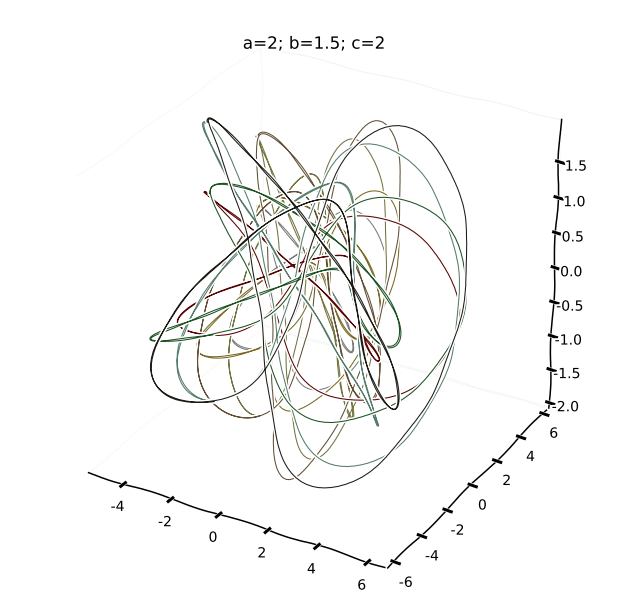

In [13]:
a,b=random.randrange(2,12),1.5
c=random.randrange(1,4); pi=np.pi
r=np.arange(1,c+1); th=.75*(1+random.random())
t=np.arange(-2*b*pi,2*b*pi,
            5/10**random.randrange(2,4)) 
fx=(a+np.cos(b*t))*np.cos(t)
fy=(a+np.cos(b*t))*np.sin(t)
fz=np.sin(b*t)
fig=pl.figure(figsize=(11,11))
ax=fig.gca(projection='3d')
for i in r:
    for j in r:
        for k in r:
            col=[random.random()/2 for l in range(3)]
            ax.plot(i*fx,j*fy,k*fz,c=col,linewidth=th)
ax.xaxis.pane.fill,ax.yaxis.pane.fill,\
ax.zaxis.pane.fill=False,False,False
pl.title('a=%d; b=%.1f; c=%d'%(a,b,c)); pl.grid()